In [1]:
# Import Libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Creating dataframes for spotify charts for the countries below

df_india = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/india.csv')
df_unitedstates = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_states.csv')
df_unitedkingdom = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_kingdom.csv')

In [3]:
# Dataframe of India

df_india.head(5)
df_india["Streams"] = df_india["Streams"].str.replace(',', '').astype(float)

In [4]:
# Dataframe of United States

df_unitedstates.head(5)
df_unitedstates["Streams"] = df_unitedstates["Streams"].str.replace(',', '').astype(float)

In [5]:
# Dataframe of United Kingdom

df_unitedkingdom.head(5)

Song         Artist    Date  Streams  Rank Country  \
0        Blinding Lights     The Weeknd  3/1/20  439,557     1      gb   
1                The Box    Roddy Ricch  3/1/20  401,034     2      gb   
2  Roses - Imanbek Remix      SAINt JHN  3/1/20  342,579     3      gb   
3         No Time To Die  Billie Eilish  3/1/20  309,990     4      gb   
4        Don't Start Now       Dua Lipa  3/1/20  292,161     5      gb   

                                               Links  Danceability  Energy  \
0  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   0.796   
1  https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   0.586   
2  https://open.spotify.com/track/24Yi9hE78yPEbZ4...         0.770   0.724   
3  https://open.spotify.com/track/73SpzrcaHk0RQPF...         0.380   0.219   
4  https://open.spotify.com/track/6WrI0LAC5M1Rw2M...         0.794   0.793   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0    -4.075       0.0629       0.00147          0.000209    0.0938   0.3450   
1    -6.687       0.0559       0.10400          0.000000    0.7900   0.6420   
2    -5.484       0.0495       0.01670          0.010700    0.3530   0.8980   
3   -13.273       0.0358       0.91700          0.010400    0.0827   0.0517   
4    -4.521       0.0842       0.01250          0.000000    0.0952   0.6770   

     Tempo                                              Genre  
0  171.017  ['canadian contemporary r&b', 'canadian pop', ...  
1  116.971                     ['melodic rap', 'rap', 'trap']  
2  121.975               ['melodic rap', 'rap', 'slap house']  
3   73.537                              ['electropop', 'pop']  
4  123.941                     ['dance pop', 'pop', 'uk pop']

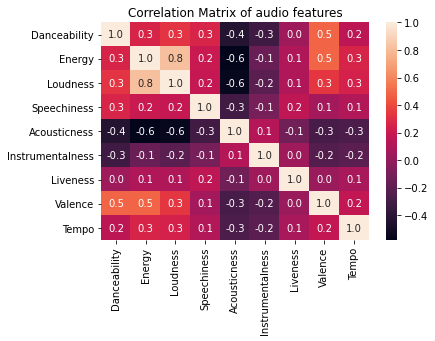

In [6]:
# Correlation matrix of audio features of the songs collected
# Strength of linear association between audio features

df_temp = df_india.append(df_unitedstates).reset_index(drop=True)
df_combined = df_temp.append(df_unitedkingdom).reset_index(drop=True)
df_combined.drop_duplicates(subset=["Song"], inplace=True)

df_audio = df_combined[['Danceability', 'Energy', 'Loudness', 
                        'Speechiness', 'Acousticness',
                        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

df_audio.corr()
sn.heatmap(df_audio.corr(), annot=True, fmt=".1f")
plt.title('Correlation Matrix of audio features')
plt.show()

In [7]:
# Lockdown phase in USA
# Music analysis

df_unitedstates['Date'] = pd.to_datetime(df_unitedstates['Date'])

start_date = '03-25-20'
end_date = '05-21-20'

date_mask = (df_unitedstates['Date'] >= start_date) & (df_unitedstates['Date'] <= end_date)

df_unitedstates_lockdown = df_unitedstates.loc[date_mask]

Song
THE SCOTTS                           3345119.0
Pain 1993 (with Playboi Carti)       2981299.0
Stuck with U (with Justin Bieber)    2365819.0
Righteous                            2308835.0
Toosie Slide                         2251305.0
Chicago Freestyle (feat. Giveon)     1961616.0
ROCKSTAR (feat. Roddy Ricch)         1943164.0
D4L                                  1792991.0
Savage Remix (feat. Beyoncé)         1772566.0
Turks (feat. Travis Scott)           1751176.0
Name: Streams, dtype: float64


<ipython-input-8-3eb7bd22a97c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedstates_temp.drop_duplicates(subset = ["Song"], inplace=True)


<AxesSubplot:title={'center':'Top 10 Streamed Songs in USA during the Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

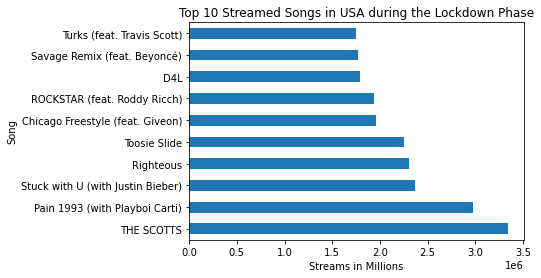

In [8]:
# Top 10 Streamed Songs in USA during the lockdown

df_unitedstates_temp = df_unitedstates_lockdown
df_unitedstates_temp.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_unitedstates = df_unitedstates_temp.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_unitedstates)

plt.title("Top 10 Streamed Songs in USA during the Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_unitedstates.plot.barh()

In [9]:
# Analysing the above songs

df_audio_valence = df_unitedstates_temp[['Song','Streams','Valence', 'Genre', 'Artist']]

df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence

<ipython-input-9-6ae41cf1d200>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song    Streams  Valence  \
120                    Blinding Lights  1671966.0   0.3340   
121                            The Box  1581354.0   0.6420   
122                    Blueberry Faygo  1114250.0   0.3490   
123                       In Your Eyes  1048294.0   0.7170   
124                             Say So   915572.0   0.7860   
130         Turks (feat. Travis Scott)  1751176.0   0.3890   
134                    Don't Start Now  1220899.0   0.6790   
163                        FIND MY WAY  1003131.0   0.7000   
165                       Toosie Slide  2251305.0   0.8370   
184              Roses - Imanbek Remix   939009.0   0.8980   
234                              @ MEH  1157976.0   0.4000   
235       ROCKSTAR (feat. Roddy Ricch)  1943164.0   0.4970   
270                         THE SCOTTS  3345119.0   0.2800   
271                          Righteous  2308835.0   0.2230   
301       Savage Remix (feat. Beyoncé)  1772566.0   0.6360   
305     Pain 1993 (with Playboi Carti)  2981299.0   0.1200   
308   Chicago Freestyle (feat. Giveon)  1961616.0   0.0397   
309                                D4L  1792991.0   0.8150   
340  Stuck with U (with Justin Bieber)  2365819.0   0.5370   
348                              GOOBA  1512145.0   0.3930   
377    Solitaires (feat. Travis Scott)  1260676.0   0.4880   

                                                 Genre  \
120  ['canadian contemporary r&b', 'canadian pop', ...   
121                     ['melodic rap', 'rap', 'trap']   
122  ['melodic rap', 'rap', 'rap conscient', 'trap'...   
123  ['canadian contemporary r&b', 'canadian pop', ...   
124                    ['dance pop', 'pop', 'pop rap']   
130  ['canadian hip hop', 'melodic rap', 'pop rap',...   
134                     ['dance pop', 'pop', 'uk pop']   
163                  ['north carolina hip hop', 'rap']   
165  ['canadian hip hop', 'canadian pop', 'hip hop'...   
184               ['melodic rap', 'rap', 'slap house']   
234                     ['atl hip hop', 'rap', 'trap']   
235                  ['north carolina hip hop', 'rap']   
270                                                 []   
271                     ['chicago rap', 'melodic rap']   
301    ['houston rap', 'pop', 'pop rap', 'trap queen']   
305  ['canadian hip hop', 'canadian pop', 'hip hop'...   
308  ['canadian hip hop', 'canadian pop', 'hip hop'...   
309  ['atl hip hop', 'pop rap', 'rap', 'southern hi...   
340                           ['pop', 'post-teen pop']   
348                                        ['emo rap']   
377  ['atl hip hop', 'pop rap', 'rap', 'southern hi...   

                                 Artist Sentiment  
120                          The Weeknd       Sad  
121                         Roddy Ricch     Happy  
122                           Lil Mosey       Sad  
123                          The Weeknd     Happy  
124                            Doja Cat     Happy  
130                          NAV, Gunna       Sad  
134                            Dua Lipa     Happy  
163                              DaBaby     Happy  
165                               Drake     Happy  
184                           SAINt JHN     Happy  
234                       Playboi Carti     Happy  
235                              DaBaby     Happy  
270  THE SCOTTS, Travis Scott, Kid Cudi       Sad  
271                          Juice WRLD       Sad  
301                 Megan Thee Stallion     Happy  
305                               Drake       Sad  
308                               Drake       Sad  
309           Future, Drake, Young Thug     Happy  
340                       Ariana Grande     Happy  
348                             6ix9ine       Sad  
377                              Future     Happy

Average Streams (%) of Sad/Happy songs in Lockdown(USA)


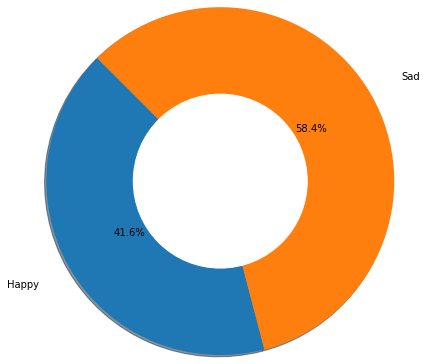

In [10]:
df_stream_unitedstates_sent = df_audio_valence.groupby(['Sentiment'])['Streams'].mean()

sent = ['Happy', 'Sad']

print("Average Streams (%) of Sad/Happy songs in Lockdown(USA)")
explode = (0.0, 0.0) 
plt.pie(df_stream_unitedstates_sent, labels = sent, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
start_date1 = '05-22-20'
end_date1 = '07-31-20'

date_mask1 = (df_unitedstates['Date'] >= start_date1) & (df_unitedstates['Date'] <= end_date1)
df_unitedstates_lockdown1 = df_unitedstates.loc[date_mask1]
df_unitedstates_lockdown1.head(20)

Song                              Artist  \
410  Rain On Me (with Ariana Grande)                           Lady Gaga   
411     ROCKSTAR (feat. Roddy Ricch)                              DaBaby   
412                       THE SCOTTS  THE SCOTTS, Travis Scott, Kid Cudi   
413                  Blinding Lights                          The Weeknd   
414                  Blueberry Faygo                           Lil Mosey   
415     ROCKSTAR (feat. Roddy Ricch)                              DaBaby   
416  Rain On Me (with Ariana Grande)                           Lady Gaga   
417                       THE SCOTTS  THE SCOTTS, Travis Scott, Kid Cudi   
418                  Blinding Lights                          The Weeknd   
419                  Blueberry Faygo                           Lil Mosey   
420     ROCKSTAR (feat. Roddy Ricch)                              DaBaby   
421  Rain On Me (with Ariana Grande)                           Lady Gaga   
422                       THE SCOTTS  THE SCOTTS, Travis Scott, Kid Cudi   
423                  Blinding Lights                          The Weeknd   
424                  Blueberry Faygo                           Lil Mosey   
425     ROCKSTAR (feat. Roddy Ricch)                              DaBaby   
426  Rain On Me (with Ariana Grande)                           Lady Gaga   
427                       THE SCOTTS  THE SCOTTS, Travis Scott, Kid Cudi   
428                  Blinding Lights                          The Weeknd   
429                  Blueberry Faygo                           Lil Mosey   

          Date    Streams  Rank Country  \
410 2020-05-22  2234783.0     1      us   
411 2020-05-22  1835106.0     2      us   
412 2020-05-22  1344563.0     3      us   
413 2020-05-22  1145927.0     4      us   
414 2020-05-22  1137765.0     5      us   
415 2020-05-23  1782358.0     1      us   
416 2020-05-23  1687797.0     2      us   
417 2020-05-23  1313345.0     3      us   
418 2020-05-23  1135805.0     4      us   
419 2020-05-23  1092723.0     5      us   
420 2020-05-24  1634858.0     1      us   
421 2020-05-24  1385449.0     2      us   
422 2020-05-24  1209247.0     3      us   
423 2020-05-24  1056693.0     4      us   
424 2020-05-24  1020203.0     5      us   
425 2020-05-25  1606066.0     1      us   
426 2020-05-25  1285339.0     2      us   
427 2020-05-25  1186098.0     3      us   
428 2020-05-25  1033240.0     4      us   
429 2020-05-25  1024855.0     5      us   

                                                 Links  Danceability  Energy  \
410  https://open.spotify.com/track/24ySl2hOPGCDcxB...         0.672   0.855   
411  https://open.spotify.com/track/7ytR5pFWmSjzHJI...         0.746   0.690   
412  https://open.spotify.com/track/39Yp9wwQiSRIDOv...         0.716   0.537   
413  https://open.spotify.com/track/0VjIjW4GlUZAMYd...         0.514   0.730   
414  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   0.554   
415  https://open.spotify.com/track/7ytR5pFWmSjzHJI...         0.746   0.690   
416  https://open.spotify.com/track/24ySl2hOPGCDcxB...         0.672   0.855   
417  https://open.spotify.com/track/39Yp9wwQiSRIDOv...         0.716   0.537   
418  https://open.spotify.com/track/0VjIjW4GlUZAMYd...         0.514   0.730   
419  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   0.554   
420  https://open.spotify.com/track/7ytR5pFWmSjzHJI...         0.746   0.690   
421  https://open.spotify.com/track/24ySl2hOPGCDcxB...         0.672   0.855   
422  https://open.spotify.com/track/39Yp9wwQiSRIDOv...         0.716   0.537   
423  https://open.spotify.com/track/0VjIjW4GlUZAMYd...         0.514   0.730   
424  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   0.554   
425  https://open.spotify.com/track/7ytR5pFWmSjzHJI...         0.746   0.690   
426  https://open.spotify.com/track/24ySl2hOPGCDcxB...         0.672   0.855   
427  https://open.spotify.com/track/39Yp9wwQiSRIDOv...         0.716   0.537   
428  https:

<ipython-input-12-5a6a670cd07a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedstates_temp1.drop_duplicates(subset = ["Song"], inplace=True)


Song
the 1                                                    4175284.0
cardigan                                                 3937822.0
exile (feat. Bon Iver)                                   3829002.0
Conversations                                            3452709.0
the last great american dynasty                          3348161.0
Come & Go (with Marshmello)                              3220828.0
my tears ricochet                                        3202928.0
Life's A Mess (feat. Halsey)                             3094307.0
Hate The Other Side (with Marshmello & The Kid Laroi)    2855162.0
Titanic                                                  2826000.0
Name: Streams, dtype: float64


<AxesSubplot:title={'center':'Top 10 Streamed Songs in USA during the Post-Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

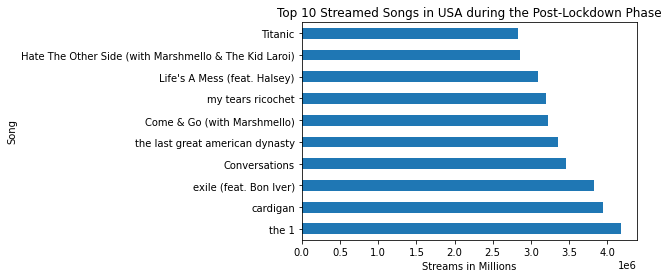

In [12]:
df_unitedstates_temp1 = df_unitedstates_lockdown1
df_unitedstates_temp1.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_unitedstates1 = df_unitedstates_temp1.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_unitedstates1)

plt.title("Top 10 Streamed Songs in USA during the Post-Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_unitedstates1.plot.barh()

In [13]:
df_audio_valence1 = df_unitedstates_temp1[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence1

<ipython-input-13-6574fe6af6f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song    Streams  Valence  \
410                    Rain On Me (with Ariana Grande)  2234783.0   0.6460   
411                       ROCKSTAR (feat. Roddy Ricch)  1835106.0   0.4970   
412                                         THE SCOTTS  1344563.0   0.2800   
413                                    Blinding Lights  1145927.0   0.3340   
414                                    Blueberry Faygo  1137765.0   0.3490   
447                        Sour Candy (with BLACKPINK)  1541858.0   0.7840   
448               Tell Me U Luv Me (with Trippie Redd)  1126035.0   0.3790   
453                                       Toosie Slide  1062929.0   0.8450   
464                                         Party Girl   926395.0   0.6290   
466                                    This Is America  1117512.0   0.5490   
517                                 The Bigger Picture  1103275.0   0.1530   
540                                  Snow On Tha Bluff  1469240.0   0.2350   
554                                   Watermelon Sugar   901907.0   0.5570   
584  WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...   929145.0   0.8350   
609                               Wash Us In The Blood   924697.0   0.3810   
621            For The Night (feat. Lil Baby & DaBaby)  1450903.0   0.3470   
622              The Woo (feat. 50 Cent & Roddy Ricch)  1284269.0   0.2860   
623                     Aim For The Moon (feat. Quavo)  1123896.0   0.4320   
655                                      Conversations  3452709.0   0.5700   
656                        Come & Go (with Marshmello)  3220828.0   0.5350   
657                       Life's A Mess (feat. Halsey)  3094307.0   0.1770   
658  Hate The Other Side (with Marshmello & The Kid...  2855162.0   0.6470   
659                                            Titanic  2826000.0   0.2340   
662                                       Wishing Well  2197657.0   0.0804   
690                              POPSTAR (feat. Drake)  2013630.0   0.4500   
720                                     The Climb Back  1507441.0   0.2870   
722                                   Lion King On Ice  1396723.0   0.2270   
725                                              the 1  4175284.0   0.1720   
726                                           cardigan  3937822.0   0.5510   
727                             exile (feat. Bon Iver)  3829002.0   0.1520   
728                    the last great american dynasty  3348161.0   0.7060   
729                                  my tears ricochet  3202928.0   0.1110   
760                                          my future  2094143.0   0.0875   

                                                 Genre  \
410              ['dance pop', 'pop', 'post-teen pop']   
411                  ['north carolina hip hop', 'rap']   
412                                                 []   
413  ['canadian contemporary r&b', 'canadian pop', ...   
414  ['melodic rap', 'rap', 'rap conscient', 'trap'...   
447              ['dance pop', 'pop', 'post-teen pop']   
448                     ['chicago rap', 'melodic rap']   
453  ['canadian hip hop', 'canadian pop', 'hip hop'...   
464                                    ['melodic rap']   
466       ['atl hip hop', 'hip hop', 'pop rap', 'rap']   
517         ['atl hip hop', 'atl trap', 'rap', 'trap']   
540  ['conscious hip hop', 'hip hop', 'north caroli...   
554                           ['pop', 'post-teen pop']   
584  ['deep underground hip hop', 'kentucky hip hop...   
609                             ['chicago rap', 'rap']   
621                                 ['brooklyn drill']   
622                                 ['brooklyn drill']   
623                                 ['brooklyn drill']   
655                     ['chicago rap', 'melodic rap']   
656                     ['chicago rap', 'melodic rap']   
657                     ['chicago rap', 'melodic rap']   
658                     ['chicago rap', 'melodic rap']   
659                     ['chicago rap', 'melodic rap']   
662  

Average Streams (%) of Sad/Happy songs Post-Lockdown(USA)


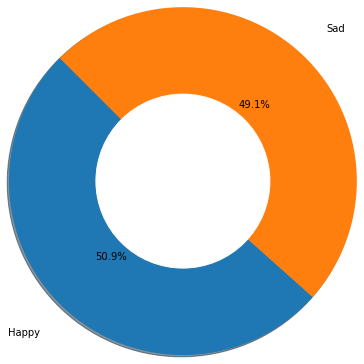

In [14]:
df_stream_unitedstates_sent1 = df_audio_valence1.groupby(['Sentiment'])['Streams'].mean()

sent1 = ['Happy', 'Sad']

print("Average Streams (%) of Sad/Happy songs Post-Lockdown(USA)")
explode = (0.0, 0.0) 
plt.pie(df_stream_unitedstates_sent1, labels = sent1, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
start_date2 = '03-25-20'
end_date2 = '05-21-20'

date_mask2 = (df_unitedstates['Date'] >= start_date2) & (df_unitedstates['Date'] <= end_date2)
df_unitedstates_lockdown2 = df_unitedstates.loc[date_mask2]

In [16]:
df_unitedstates_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence2 = df_unitedstates_lockdown2[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Happy']
df_sad = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Sad']

<ipython-input-16-d667b6fbccd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedstates_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-16-d667b6fbccd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown(USA)


<AxesSubplot:xlabel='Artist', ylabel='Streams'>

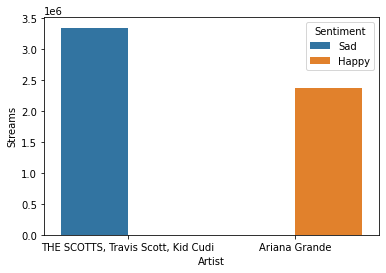

In [17]:

df_sadplt = df_sad.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt = df_happy.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown(USA)")
result = df_sadplt.append(df_happyplt).reset_index(drop=True)
result["Artist"]
sns.barplot(x="Artist", y="Streams", data=result, hue="Sentiment")

In [18]:
start_date3 = '05-21-20'
end_date3 = '07-31-20'

date_mask3 = (df_unitedstates['Date'] >= start_date3) & (df_unitedstates['Date'] <= end_date3)
df_unitedstates_lockdown3 = df_unitedstates.loc[date_mask3]

In [19]:
df_unitedstates_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence3 = df_unitedstates_lockdown3[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Happy']
df_sad1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Sad']

<ipython-input-19-ba34182389d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedstates_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-19-ba34182389d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown(USA)


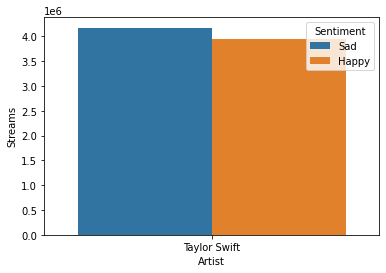

In [20]:

df_sadplt1 = df_sad1.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt1 = df_happy1.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown(USA)")

result1 = df_sadplt1.append(df_happyplt1).reset_index(drop=True)
result1["Artist"]
ax = sns.barplot(x="Artist", y="Streams", data=result1, hue="Sentiment")

In [21]:
# Kmeans

df_unitedstates_cluster = df_unitedstates.copy()
X = df_unitedstates_cluster.iloc[:, [7,8,9,10,11,12,13,14,15]].values

In [22]:
print(X.shape)

(765, 9)


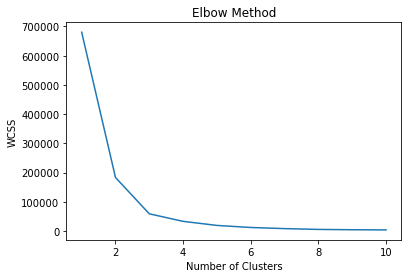

In [23]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Taking 5 clusters

scaleVar = MinMaxScaler()
scaledVar = scaleVar.fit_transform(X)

#Kmeans 5 clusters according to elbow

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaledVar)

In [25]:
# pred values 
y_kmeans

array([4, 0, 1, 0, 3, 4, 1, 0, 1, 3, 4, 1, 3, 1, 0, 4, 1, 3, 1, 0, 4, 1,
       3, 1, 0, 0, 0, 3, 4, 4, 0, 4, 0, 3, 1, 4, 0, 1, 0, 1, 4, 0, 1, 1,
       0, 4, 1, 1, 0, 0, 4, 1, 1, 0, 3, 4, 1, 1, 3, 1, 0, 4, 3, 0, 0, 4,
       0, 3, 1, 3, 4, 0, 3, 1, 1, 4, 0, 3, 1, 1, 4, 3, 1, 0, 1, 4, 3, 1,
       0, 0, 4, 3, 1, 0, 1, 1, 3, 4, 0, 3, 1, 4, 0, 3, 1, 1, 4, 0, 3, 1,
       1, 4, 0, 3, 3, 1, 4, 0, 3, 3, 1, 4, 3, 0, 0, 1, 4, 3, 0, 0, 4, 1,
       4, 3, 0, 1, 4, 4, 3, 0, 4, 1, 3, 4, 0, 1, 4, 3, 4, 0, 1, 4, 3, 0,
       4, 1, 4, 3, 0, 4, 4, 1, 3, 3, 0, 3, 4, 1, 3, 3, 3, 4, 1, 3, 3, 3,
       4, 1, 3, 3, 3, 4, 1, 3, 0, 3, 4, 1, 3, 0, 3, 4, 1, 3, 0, 3, 4, 3,
       1, 0, 3, 4, 1, 3, 0, 3, 1, 4, 3, 0, 3, 4, 1, 3, 0, 3, 3, 4, 1, 0,
       3, 3, 1, 4, 0, 3, 3, 1, 4, 0, 3, 3, 4, 1, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 1, 4, 3, 3, 3, 1, 4, 3, 3, 1, 3, 4, 3, 3, 1, 4, 3, 3, 3, 1, 4,
       3, 3, 3, 1, 4, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3,
       1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3,

In [26]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['K-Means Cluster']

In [27]:
df_unitedstates_cluster = pd.concat([df_unitedstates_cluster, kmeans], axis=1)
df_unitedstates_cluster.head(5)

Song       Artist       Date    Streams  Rank  \
0                     The Box  Roddy Ricch 2020-03-01  2145340.0     1   
1                      Say So     Doja Cat 2020-03-01  1116529.0     2   
2             Blinding Lights   The Weeknd 2020-03-01  1106280.0     3   
3  Life Is Good (feat. Drake)       Future 2020-03-01  1048449.0     4   
4             Blueberry Faygo    Lil Mosey 2020-03-01  1043040.0     5   

  Country                                              Links  Danceability  \
0      us  https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   
1      us  https://open.spotify.com/track/3Dv1eDb0MEgF93G...         0.787   
2      us  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   
3      us  https://open.spotify.com/track/5yY9lUy8nbvjM1U...         0.676   
4      us  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   

   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
0   0.586    -6.687       0.0559       0.10400          0.000000    0.7900   
1   0.673    -4.577       0.1580       0.25600          0.000004    0.0904   
2   0.796    -4.075       0.0629       0.00147          0.000209    0.0938   
3   0.609    -5.831       0.4810       0.07060          0.000000    0.1520   
4   0.554    -7.909       0.0383       0.20700          0.000000    0.1320   

   Valence    Tempo                                              Genre  \
0    0.642  116.971                     ['melodic rap', 'rap', 'trap']   
1    0.786  110.962                    ['dance pop', 'pop', 'pop rap']   
2    0.345  171.017  ['canadian contemporary r&b', 'canadian pop', ...   
3    0.508  142.037  ['atl hip hop', 'pop rap', 'rap', 'southern hi...   
4    0.349   99.034  ['melodic rap', 'rap', 'rap conscient', 'trap'...   

   K-Means Cluster  
0                4  
1                0  
2                1  
3                0  
4                3

In [28]:
# Songs in part of cluster 0
df_0_cluster = df_unitedstates_cluster.loc[df_unitedstates_cluster['K-Means Cluster'] == 0]
df_0_cluster.drop_duplicates(subset=['Song']).head(5)

Song        Artist       Date    Streams  Rank  \
1                       Say So      Doja Cat 2020-03-01  1116529.0     2   
3   Life Is Good (feat. Drake)        Future 2020-03-01  1048449.0     4   
25                  Baby Pluto  Lil Uzi Vert 2020-03-06  3364245.0     1   
26                     Lo Mein  Lil Uzi Vert 2020-03-06  2839950.0     2   
60                       Myron  Lil Uzi Vert 2020-03-13  2271346.0     1   

   Country                                              Links  Danceability  \
1       us  https://open.spotify.com/track/3Dv1eDb0MEgF93G...         0.787   
3       us  https://open.spotify.com/track/5yY9lUy8nbvjM1U...         0.676   
25      us  https://open.spotify.com/track/7hav1MHURQf5SAo...         0.772   
26      us  https://open.spotify.com/track/6CUP2khYzdphXeb...         0.855   
60      us  https://open.spotify.com/track/56uXDJRCuoS7abX...         0.771   

    Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
1    0.673    -4.577        0.158        0.2560          0.000004    0.0904   
3    0.609    -5.831        0.481        0.0706          0.000000    0.1520   
25   0.634    -6.101        0.212        0.1350          0.000000    0.4320   
26   0.676    -5.736        0.325        0.0888          0.000000    0.1440   
60   0.654    -6.976        0.298        0.0550          0.000000    0.2140   

    Valence    Tempo                                              Genre  \
1     0.786  110.962                    ['dance pop', 'pop', 'pop rap']   
3     0.508  142.037  ['atl hip hop', 'pop rap', 'rap', 'southern hi...   
25    0.671  160.052       ['melodic rap', 'philly rap', 'rap', 'trap']   
26    0.509  133.082       ['melodic rap', 'philly rap', 'rap', 'trap']   
60    0.573  155.047       ['melodic rap', 'philly rap', 'rap', 'trap']   

    K-Means Cluster  
1                 0  
3                 0  
25                0  
26                0  
60                0

In [29]:
# Songs in part of cluster 1
df_1_cluster = df_unitedstates_cluster.loc[df_unitedstates_cluster['K-Means Cluster'] == 1]
df_1_cluster.drop_duplicates(subset=['Song']).head(5)

Song        Artist       Date    Streams  Rank Country  \
2           Blinding Lights    The Weeknd 2020-03-01  1106280.0     3      us   
6                  That Way  Lil Uzi Vert 2020-03-02  1751164.0     2      us   
34                       P2  Lil Uzi Vert 2020-03-07  1922227.0     5      us   
37   That Way - Bonus Track  Lil Uzi Vert 2020-03-08  1573643.0     3      us   
104               Heartless    The Weeknd 2020-03-21  1299759.0     5      us   

                                                 Links  Danceability  Energy  \
2    https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   0.796   
6    https://open.spotify.com/track/5raTDhlbxFDnpn8...         0.719   0.611   
34   https://open.spotify.com/track/3kW4z2pIj5VY5fL...         0.775   0.720   
37   https://open.spotify.com/track/2ajzBr7vwHTEBeq...         0.712   0.598   
104  https://open.spotify.com/track/6bnF93Rx87YqUBL...         0.537   0.746   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
2      -4.075       0.0629       0.00147          0.000209    0.0938    0.345   
6      -5.010       0.0403       0.05820          0.000000    0.1550    0.489   
34     -5.353       0.1930       0.02360          0.000000    0.1140    0.490   
37     -5.368       0.0388       0.05460          0.000000    0.1540    0.504   
104    -5.507       0.1500       0.02360          0.000001    0.1560    0.252   

       Tempo                                              Genre  \
2    171.017  ['canadian contemporary r&b', 'canadian pop', ...   
6    129.962       ['melodic rap', 'philly rap', 'rap', 'trap']   
34   155.086       ['melodic rap', 'philly rap', 'rap', 'trap']   
37   130.007       ['melodic rap', 'philly rap', 'rap', 'trap']   
104  170.062                             ['chicago rap', 'rap']   

     K-Means Cluster  
2                  1  
6                  1  
34                 1  
37                 1  
104                1

In [30]:
# Songs in part of cluster 2
df_2_cluster = df_unitedstates_cluster.loc[df_unitedstates_cluster['K-Means Cluster'] == 2]
df_2_cluster.drop_duplicates(subset=['Song']).head(5)

Song          Artist       Date    Streams  \
308  Chicago Freestyle (feat. Giveon)           Drake 2020-05-01  1961616.0   
464                        Party Girl  StaySolidRocky 2020-06-01   926395.0   
540                 Snow On Tha Bluff         J. Cole 2020-06-17  1469240.0   
623    Aim For The Moon (feat. Quavo)       Pop Smoke 2020-07-03  1123896.0   
657      Life's A Mess (feat. Halsey)      Juice WRLD 2020-07-10  3094307.0   

     Rank Country                                              Links  \
308     4      us  https://open.spotify.com/track/4wVOKKEHUJxHCFF...   
464     5      us  https://open.spotify.com/track/5RqR4ZCCKJDcBLI...   
540     1      us  https://open.spotify.com/track/1oOEkBNp4zWnkD7...   
623     4      us  https://open.spotify.com/track/6O7fPYTsb2mY0Pi...   
657     3      us  https://open.spotify.com/track/4h5N4KyWZMtpeH9...   

     Danceability  Energy  Loudness  Speechiness  Acousticness  \
308         0.735   0.449    -7.507       0.3470         0.629   
464         0.728   0.431    -9.966       0.0622         0.749   
540         0.586   0.512    -8.819       0.0668         0.723   
623         0.713   0.605    -7.487       0.1070         0.497   
657         0.630   0.446    -8.900       0.0351         0.337   

     Instrumentalness  Liveness  Valence    Tempo  \
308          0.000000    0.1130   0.0397  122.947   
464          0.000000    0.0996   0.6290  130.022   
540          0.000200    0.1190   0.2350   75.857   
623          0.000003    0.1150   0.4320  142.025   
657          0.000000    0.1660   0.1770  143.078   

                                                 Genre  K-Means Cluster  
308  ['canadian hip hop', 'canadian pop', 'hip hop'...                2  
464                                    ['melodic rap']                2  
540  ['conscious hip hop', 'hip hop', 'north caroli...                2  
623                                 ['brooklyn drill']                2  
657                     ['chicago rap', 'melodic rap']                2

In [31]:
# Songs in part of cluster 3
df_3_cluster = df_unitedstates_cluster.loc[df_unitedstates_cluster['K-Means Cluster'] == 3]
df_3_cluster.drop_duplicates(subset=['Song']).head(5)

Song        Artist       Date    Streams  Rank  \
4                  Blueberry Faygo     Lil Mosey 2020-03-01  1043040.0     5   
27                     Silly Watch  Lil Uzi Vert 2020-03-06  2591124.0     3   
62  Bean (Kobe) [feat. Chief Keef]  Lil Uzi Vert 2020-03-13  1852364.0     3   
96                     Alone Again    The Weeknd 2020-03-20  2284779.0     2   
99                  Scared To Live    The Weeknd 2020-03-20  2004568.0     5   

   Country                                              Links  Danceability  \
4       us  https://open.spotify.com/track/22LAwLoDA5b4AaG...         0.774   
27      us  https://open.spotify.com/track/5egD7A5x9AHdVO2...         0.903   
62      us  https://open.spotify.com/track/0IpnZchq8ek2A6p...         0.733   
96      us  https://open.spotify.com/track/6b5P51m8xx2XA6U...         0.218   
99      us  https://open.spotify.com/track/4BGZF4oLbTL0pWm...         0.504   

    Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
4    0.554    -7.909       0.0383        0.2070             0.000    0.1320   
27   0.535    -6.238       0.2860        0.0298             0.000    0.0851   
62   0.567    -6.718       0.3190        0.0129             0.000    0.3820   
96   0.652    -7.953       0.0641        0.0330             0.111    0.1720   
99   0.498    -8.240       0.0499        0.1310             0.000    0.0929   

    Valence    Tempo                                              Genre  \
4    0.3490   99.034  ['melodic rap', 'rap', 'rap conscient', 'trap'...   
27   0.1570  130.117       ['melodic rap', 'philly rap', 'rap', 'trap']   
62   0.3190   75.491       ['melodic rap', 'philly rap', 'rap', 'trap']   
96   0.0599   65.375  ['canadian contemporary r&b', 'canadian pop', ...   
99   0.1960   87.221  ['canadian contemporary r&b', 'canadian pop', ...   

    K-Means Cluster  
4                 3  
27                3  
62                3  
96                3  
99                3

In [32]:
# Songs in part of cluster 4
df_4_cluster = df_unitedstates_cluster.loc[df_unitedstates_cluster['K-Means Cluster'] == 4]
df_4_cluster.drop_duplicates(subset=['Song']).head(5)

Song        Artist       Date    Streams  \
0                                 The Box   Roddy Ricch 2020-03-01  2145340.0   
28                                    POP  Lil Uzi Vert 2020-03-06  2200826.0   
97                               Too Late    The Weeknd 2020-03-20  2063782.0   
130            Turks (feat. Travis Scott)    NAV, Gunna 2020-03-27  1751176.0   
448  Tell Me U Luv Me (with Trippie Redd)    Juice WRLD 2020-05-29  1126035.0   

     Rank Country                                              Links  \
0       1      us  https://open.spotify.com/track/0nbXyq5TXYPCO7p...   
28      4      us  https://open.spotify.com/track/1jDbQz6tr52WgSc...   
97      3      us  https://open.spotify.com/track/2K9Ovn1o2bTGqbs...   
130     1      us  https://open.spotify.com/track/0lSZh5W0wDeurkG...   
448     4      us  https://open.spotify.com/track/4CNcRgjGw1v9VQa...   

     Danceability  Energy  Loudness  Speechiness  Acousticness  \
0           0.896   0.586    -6.687       0.0559       0.10400   
28          0.741   0.599    -6.672       0.4190       0.00961   
97          0.638   0.863    -5.221       0.1320       0.05200   
130         0.893   0.618    -4.425       0.1120       0.08270   
448         0.609   0.757    -5.605       0.1190       0.29900   

     Instrumentalness  Liveness  Valence    Tempo  \
0            0.000000     0.790    0.642  116.971   
28           0.000000     0.785    0.276  139.891   
97           0.000055     0.685    0.226  120.077   
130          0.000000     0.542    0.389  119.099   
448          0.000000     0.630    0.379  128.022   

                                                 Genre  K-Means Cluster  
0                       ['melodic rap', 'rap', 'trap']                4  
28   ['dance pop', 'hip hop', 'miami hip hop', 'pop...                4  
97   ['canadian contemporary r&b', 'canadian pop', ...                4  
130  ['canadian hip hop', 'melodic rap', 'pop rap',...                4  
448                     ['chicago rap', 'melodic rap']                4

In [33]:
df_unitedstates_cluster.groupby("K-Means Cluster").describe()


Streams                                                    \
                  count          mean            std       min        25%   
K-Means Cluster                                                             
0                 101.0  1.233565e+06  425986.078439  790286.0   973448.0   
1                 183.0  1.362977e+06  409128.940288  874353.0  1060411.5   
2                  82.0  1.535006e+06  711089.114614  882749.0  1059418.5   
3                 338.0  1.359743e+06  373140.969744  871482.0  1103547.0   
4                  61.0  1.571908e+06  329306.507552  958440.0  1328068.0   

                                                    Rank            ...  \
                       50%         75%        max  count      mean  ...   
K-Means Cluster                                                     ...   
0                1116372.0  1285339.00  3364245.0  101.0  3.613861  ...   
1                1279639.0  1512047.50  3452709.0  183.0  3.191257  ...   
2                1321628.0  1796290.25  4175284.0   82.0  2.890244  ...   
3                1300280.5  1524990.25  3345119.0  338.0  2.852071  ...   
4                1481060.0  1840150.00  2202849.0   61.0  2.377049  ...   

                Valence         Tempo                                  \
                    75%    max  count        mean        std      min   
K-Means Cluster                                                         
0                 0.835  0.898  101.0  126.809030  21.099598   84.459   
1                 0.450  0.570  183.0  162.022645  14.552977   99.700   
2                 0.629  0.706   82.0  126.521012  20.270301   75.602   
3                 0.497  0.845  338.0   99.305098  16.259975   65.375   
4                 0.642  0.642   61.0  117.788131   3.275003  116.971   

                                                     
                     25%      50%      75%      max  
K-Means Cluster                                      
0                110.962  123.056  145.013  170.004  
1                149.972  171.005  171.005  178.765  
2                130.022  130.022  139.883  147.922  
3                 89.977   99.034   99.034  151.044  
4                116.971  116.971  116.971  139.891  

[5 rows x 88 columns]

In [34]:
df_unitedstates_cluster.groupby("K-Means Cluster")["Valence"].describe()


count      mean       std     min    25%    50%    75%    max
K-Means Cluster                                                               
0                101.0  0.710109  0.125137  0.3810  0.636  0.679  0.835  0.898
1                183.0  0.358981  0.118944  0.0804  0.334  0.334  0.450  0.570
2                 82.0  0.439929  0.233214  0.0397  0.172  0.590  0.629  0.706
3                338.0  0.449958  0.191079  0.0599  0.349  0.349  0.497  0.845
4                 61.0  0.599984  0.104287  0.2260  0.642  0.642  0.642  0.642